# Project_2

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (or  $ \$\$ \quad\$\$ $).

### Evaluation criteria (100% in total)
### Extra points (5% max)
1. +5% in case clear, "pythonic" and understandable code style


In [ ]:
#pip install bds_courseware

In [ ]:
#import all needed packeges
import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Task 1

## Task 1 (30% max)
1. Requested formulas are provided (5%)
2. All necessary experiments are done (10%)
3. Results are analysed with commentaries (15%)

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to strata volumes;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each experiment plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.   
* Also provide commentaries as summaries and analysis of results after each visualization.


## Solution for Task 1

## Formulas:

### Random selection from the entire population:
- mean $\mu$ of the population:
\
$\mu = \frac{1}{N}\sum_{i=1}^{N} x_i$
- standard deviation:
\
$SD =\sqrt{ \frac{1}{N}\sum_{i=0}^{N} (x-\mu)^2}$
- variance is $SD^2$

### Stratified sample point estimations:

#### Stratified samples:
- Within the kth strata let’s take a sample of volume nk:
\
$(X_1k,..., X_{nkk})$, $k \in {{1, 2, 3}}$
- Sample mean:
\
$\bar{X}_k = \frac{1}{n_k}\sum_{i=1}^{n_k} \hat{X}_{ik}$
- Sample variance:
\
$Dk = \frac{1}{n}\sum_{i=1}^{n_k} ({X}_{ik}-\bar{X}_k)^2$

#### Mean expectation estimation for a mixture:
1. mixture sample mean
\
$\bar{X}_S = \sum_{i=1}^{3} {\alpha}*\bar{X}_k$

2. EV of mixture sample mean
\
$\bar{EX}_S = \sum_{i=1}^{3} {\alpha}*\bar{EX}_k$
3. Variance of mixture sample mean
\
$\bar{DX}_S = \sum_{i=1}^{3} {\alpha}^2*\bar{DX}_k$

### Sample volumes if they are sampled proportionally:

$\bar{n}_k=n*{\alpha}_k$, $k \in {{1, 2, 3}}$, $n=n_1+n_2+n_3$

### Sample volumes if they are optimal sampled (Neyman's method):

$n_k = n* {\frac{\alpha_{k}*{\sigma}}{\sum_{k=1}^{L} \alpha_{k}*{\sigma}}}$, $k \in {{1, 2, 3}}$, $n=n_1+n_2+n_3$

**GeneralPopulation class**  
Already has methods for creating general population as a mixture of strata, for generating subsample with random, optimal and stratified techniques:

In [ ]:
class GeneralPopulation:

    def __init__(self,
                 means: [float],
                 stds: [float],
                 sizes: [int],
                 random_state: int = 15
                 ):
        """
        Initializes our General Population and saves the given distributions

        :param means: List of expectations for normal distributions
        :param stds: List of standard deviations for normal distributions
        :param sizes: How many objects will be in each strata
        :param random_state: Parameter fixing randomness. Needed so that when conducting
        experiment repeatedly with the same input parameters, the results remained the same
        """
        self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
        self._sample(sizes)
        self.random_state = random_state

    def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata

        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]

        # number of strata
        self.count_strats = len(sizes)

        # ratios for every strata in GP
        self.ws = [size / self.N for size in sizes]

        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)

        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

    def random_subsampling(self, size):
        """Creates a random subset of the entire population

        :param sizes: subsample size
        """
        rc = np.random.choice(self.general_samples, size=size)
        return rc

    def proportional_subsampling(self, size):
        """Creates a subsample with the number of elements, proportional shares of strata

        :param sizes: subsample size
        """
        self.strats_size_proport = [int(np.floor(size * w)) for w in self.ws]

        rc = []
        for k in range(len(self.strats_size_proport)):
            rc.append(np.random.choice(self.strats_samples[k],
                                       size=self.strats_size_proport[k]))

        return rc

    def optimal_subsampling(self, size):
        """Creates a subsample with the optimal number of elements relative to strata

        :param sizes: subsample size
        """
        sum_denom = 0
        for k in range(self.count_strats):
            sum_denom += self.ws[k] * self.sigmas[k]

        self.strats_size_optimal = [int(np.floor((size * w * sigma) / sum_denom)) for w, sigma in
                                    zip(self.ws, self.sigmas)]
        if 0 in self.strats_size_optimal:
            raise ValueError('Strats size is 0, please change variance of smallest strat!')

        rc = []
        for k in range(len(self.strats_size_optimal)):
            rc.append(np.random.choice(self.strats_samples[k],
                                       size=self.strats_size_optimal[k]))

        return rc

    def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
        """Conducts a series of experiments and saves the results

        :param subsampling_method: method for creating a subsample
        :param n_experiments: number of experiment starts
        """
        means_s = []

        if (len(self.general_samples) < 100):
            n_sub = 20

        if (subsampling_method == 'random_subsampling'):
            for n in range(n_experiments):
                rc = self.random_subsampling(n_sub)

                mean = rc.sum() / len(rc)
                means_s.append(mean)

        else:
            for n in range(n_experiments):
                if (subsampling_method == 'proportional_subsampling'):
                    rc = self.proportional_subsampling(n_sub)
                elif (subsampling_method == 'optimal_subsampling'):
                    rc = self.optimal_subsampling(n_sub)

                strats_mean = []

                for k in range(len(rc)):
                    strats_mean.append(sum(rc[k]) / len(rc[k]))

                # Mean for a mixture
                means_s.append(sum([w_k * mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))

        return means_s

Function for histogram plot:

In [ ]:
# """HERE IS YOUR CODE
# It should be implemented as follows:
# * Takes a GeneralPopulation class instance;
# * Uses matplotlib or seaborn packages to plot distribution for general population;
# * Don't forget a title, grid etc.
# """

def plot_distribution(general_population):
    sns.set(rc={'figure.figsize':(9,7)})
    sns.distplot(general_population.general_samples).set(title='Histogram plot')

Function for plotting Boxplots for sample mean:

In [ ]:
# """HERE IS YOUR CODE
# It should be implemented as follows:
# * Takes a GeneralPopulation class instance;
# * Runs method `run_experiments` for each sampling method and gets vector of mean values;
# * Uses matplotlib or seaborn packages to plot boxplots of mean values for each subsampling techniques;
# * Axis Y == Mean values; Axis X == subsampling methods;
# * Don't forget a title, grid etc.
# """
def plot_boxplot(general_population, N_SUBSAMPLE):

    n_experiments = 1000
    means = []
    method_names_list = []
    for method in ["random_subsampling", "proportional_subsampling", "optimal_subsampling"]:
        means = means + general_population.run_experiments(N_SUBSAMPLE, method)
        method_names_list = method_names_list + [method] * n_experiments

    df = pd.DataFrame()
    df['method'] = method_names_list
    df['means'] = means
    # create plot

    sns.set(rc={'figure.figsize':(9,7)} )
    ax = sns.boxplot(x="method", y="means", data=df, palette="rocket").set(title='Box plot')

    # show plot
    plt.show()

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [ ]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
DIFFERENT_MEAN_DIFFERENT_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [ ]:
## Creating GeneralPopulation class instances:
def initialize_class(method):
    parameters = GeneralPopulation(means = method["means"],
                            stds = method["stds"],
                            sizes = method["sizes"])
    return parameters

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

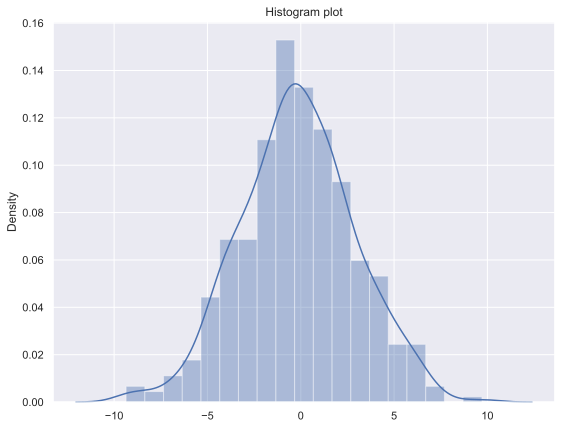

In [ ]:
# Run plotting for density
plot_distribution(initialize_class(EQUAL_MEAN_EQUAL_STDS_ARGS))

As we can see, in case when is general population with equal means and equal stds of strata, variance is low, which means that values are clustered around the mean.

Boxplots for sample mean:

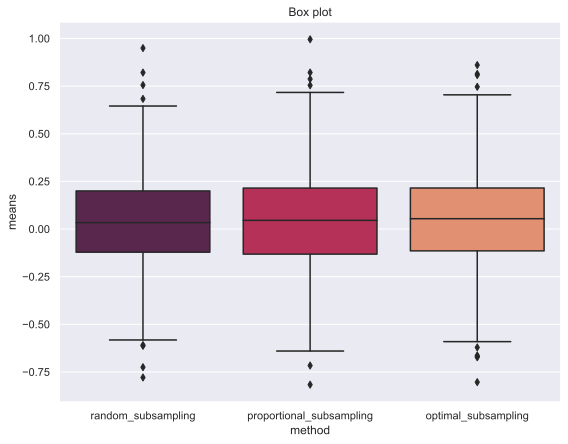

In [ ]:
plot_boxplot(initialize_class(EQUAL_MEAN_EQUAL_STDS_ARGS), N_SUBSAMPLE)

On this boxplot, we can see that boxplot for every single method when general population has equal means and equal stds of strata are almost the same. Also, median in every three cases are almost the same and value is almost -0,1.

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

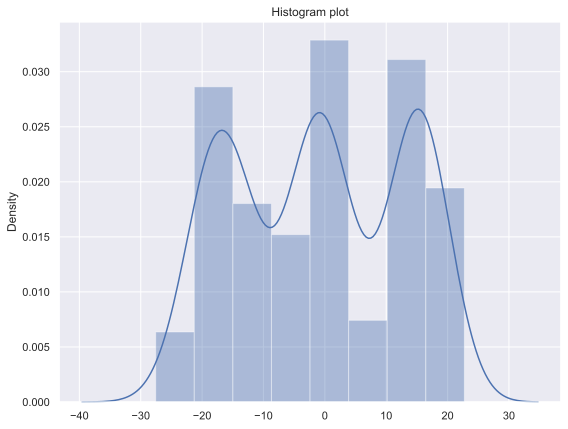

In [ ]:
# Run plotting for density
plot_distribution(initialize_class(DIFFERENT_MEAN_EQUAL_STDS_ARGS))

In case when general population has different mean and equal stds of strata, on this histogram we can see that this graph is multimodal and values are not clustered around the mean.

Boxplots for sample mean:

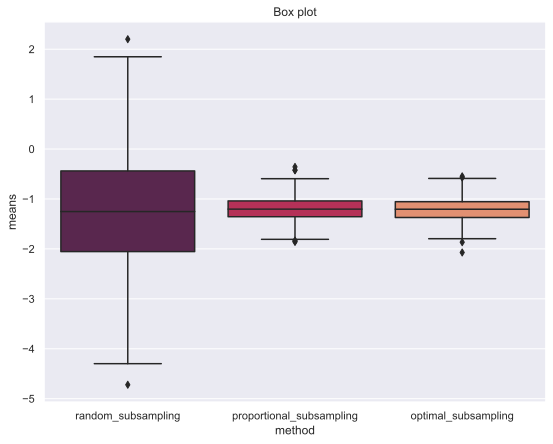

In [ ]:
plot_boxplot(initialize_class(DIFFERENT_MEAN_EQUAL_STDS_ARGS), N_SUBSAMPLE)

On previous graphic, random sunsampling boxplot has higher IQR than other two boxplots. If IQR is higher it means that there are the more spread out the value points; in contrast, the smaller the IQR, the more bunched up the values points are around the mean.

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

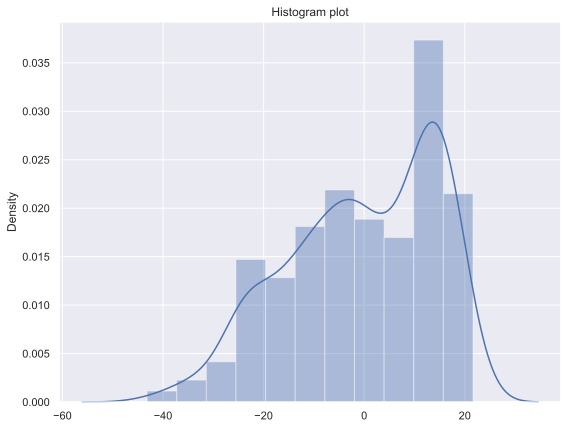

In [ ]:
# Run plotting for density
plot_distribution(initialize_class(DIFFERENT_MEAN_DIFFERENT_STDS_ARGS))

On this plot we can see that variance is not high, so it means that values are not clustered around mean. Negative skew: the left tail is longer; the mass of the distribution is concentrated on the right of the figure.

Boxplots for sample mean:

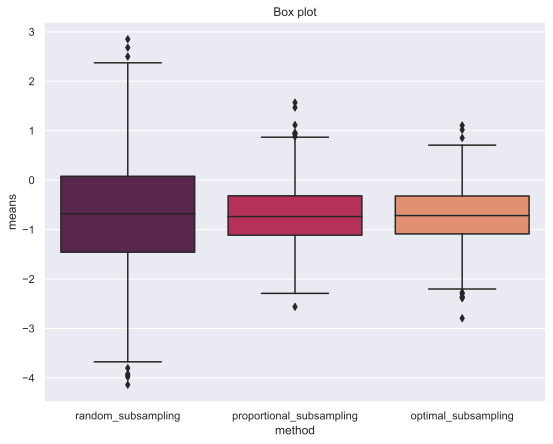

In [ ]:
plot_boxplot(initialize_class(DIFFERENT_MEAN_DIFFERENT_STDS_ARGS), N_SUBSAMPLE)

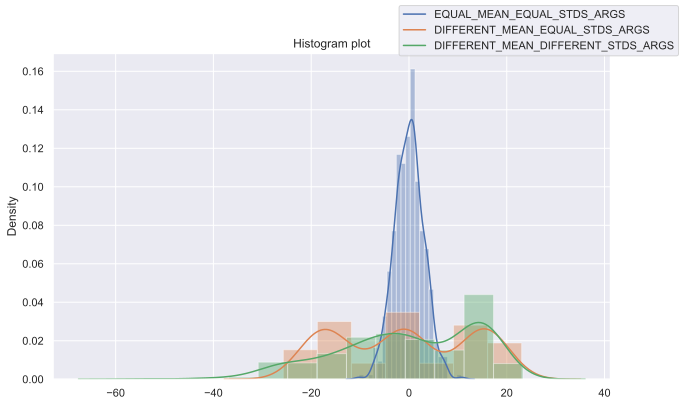

In [ ]:
methods = [EQUAL_MEAN_EQUAL_STDS_ARGS, DIFFERENT_MEAN_EQUAL_STDS_ARGS, DIFFERENT_MEAN_DIFFERENT_STDS_ARGS]
fig = plt.figure(figsize=(10,6))
for method in methods:
    parameters = GeneralPopulation(means=method["means"],
                            stds=method["stds"],
                            sizes=method["sizes"])
    plot_distribution(parameters)
fig.legend(labels = ["EQUAL_MEAN_EQUAL_STDS_ARGS", "DIFFERENT_MEAN_EQUAL_STDS_ARGS", "DIFFERENT_MEAN_DIFFERENT_STDS_ARGS"])

As we can see on previous graph, the greatest variance has distribution in case when general population is with different means and different STDs of strata and it means that values are spread out of mean. in case when means are equals and deviations are equal,it can be seen that the area under the curve of the normal distribution is almost correctly filled, which indicates that there is a small deviation from the normal distribution.

# Task 2

## Tasks 2.1 и 2.2 (40% max)
1. Visualization and/or simple exploratory data analysis are implemented (5% * 2 tasks)
2. Hypotheses are tested (5% * 2 tasks)
3. Results are analysed with commentaries (10%*2 tasks)

### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.


In [ ]:
#reading brain_data
brain_data = read_drive_dataset(*HOMEWORK_DATASETS['brain'])  # PART 1

In [ ]:
#return the first 5 rows of dataset.
brain_data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545


In [ ]:
#informations about dataset
brain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gender     40 non-null     object
 1   FSIQ       40 non-null     int64 
 2   VIQ        40 non-null     int64 
 3   PIQ        40 non-null     int64 
 4   Weight     40 non-null     object
 5   Height     40 non-null     object
 6   MRI_Count  40 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.3+ KB


In [ ]:
#descriptive statistics of data
brain_data.describe()

,FSIQ,VIQ,PIQ,MRI_Count
count,40.000000,40.000000,40.00000,4.000000e+01
mean,113.450000,112.350000,111.02500,9.087550e+05
std,24.082071,23.616107,22.47105,7.228205e+04
min,77.000000,71.000000,72.00000,7.906190e+05
25%,89.750000,90.000000,88.25000,8.559185e+05
50%,116.500000,113.000000,115.00000,9.053990e+05
75%,135.500000,129.750000,128.00000,9.500780e+05
max,144.000000,150.000000,150.00000,1.079549e+06


In [ ]:
# replace string '�' to nan value
brain_data=brain_data.replace('�', np.nan)

In [ ]:
#drop nan value
brain_data = brain_data.dropna().reset_index(drop = True)

In [ ]:
brain_data['Weight'] = brain_data['Weight'].astype(int)
brain_data['Height'] = brain_data['Height'].astype(float)

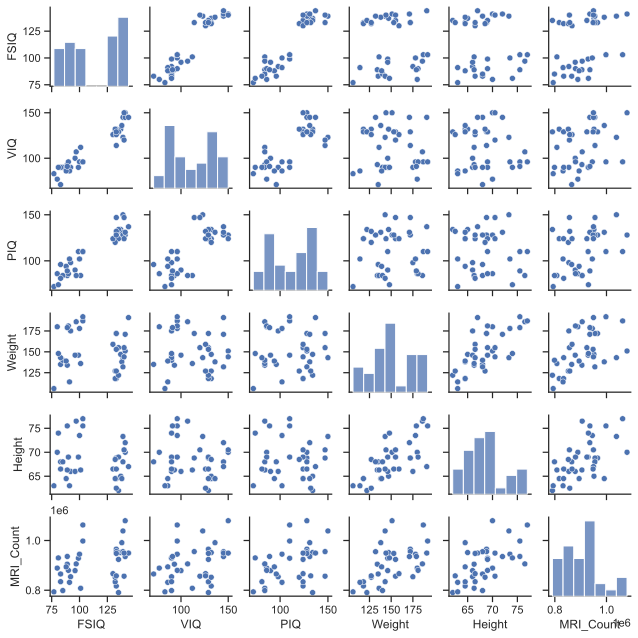

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(brain_data, height = 1.5)

In the previous graphic, we can assume where there is a negative, positive correlation, or where there is no correlation at all. The table below shows the Pearson correlation, where we can see where is a stronger positive and negative correlation (values close to 1 and -1), where is weaker correlation etc.

In [ ]:
brain_data.corr(method = 'pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.945114,0.934427,-0.051483,-0.118448,0.333714
VIQ,0.945114,1.000000,0.776020,-0.076088,-0.118976,0.300279
PIQ,0.934427,0.776020,1.000000,0.002512,-0.093156,0.377782
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.118448,-0.118976,-0.093156,0.699614,1.000000,0.588377
MRI_Count,0.333714,0.300279,0.377782,0.513378,0.588377,1.000000


We can see that there is no strong correlation between Mri_count and FSIQ, VIQ and PIQ intelligence. There is a strong correlation between intelligences(FSIQ, VIQ, PIQ). Also we will check it for men and women subsamples separately.

- Male

In [ ]:
male_data=brain_data[brain_data['Gender']=='Male']

In [ ]:
male_data.corr(method = 'pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.938321,0.930669,-0.278140,-0.385862,0.431388
VIQ,0.938321,1.000000,0.755048,-0.350453,-0.402762,0.326555
PIQ,0.930669,0.755048,1.000000,-0.156863,-0.299593,0.528423
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.385862,-0.402762,-0.299593,0.406542,1.000000,0.292849
MRI_Count,0.431388,0.326555,0.528423,-0.076875,0.292849,1.000000


For men, from the table we can see that there is a correlation between MRI_count and FSIQ(VIQ, PIQ), but it is not very high.

- Female

In [ ]:
female_data=brain_data[brain_data['Gender']=='Female']

In [ ]:
female_data.corr(method = 'pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


For women, from the table we can see that there is a low correlation between MRI_count and FSIQ(VIQ, PIQ).

### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)



In [ ]:
#reading dataset
cars_prefes_data = read_drive_dataset(*HOMEWORK_DATASETS['car_perfs'])  # PART 2

In [ ]:
cars_prefes_data.head()

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3
3,113,51,1,35,0,3,2,2,2,2,...,3,3,3,4,3,3,3,3,1,3
4,114,19,1,2,0,2,2,2,2,1,...,3,4,3,3,2,3,3,2,3,3


In [ ]:
cars_prefes_data = cars_prefes_data[["Sex", "PreferCar"]]

- Null Hypothesis → There is no significant difference between men's and women's choice of auto.
- Alternative Hypothesis → There is significant difference between men's and women's choice of auto.

In [ ]:
gender1 = cars_prefes_data[cars_prefes_data["Sex"] == 1]

In [ ]:
gender2 = cars_prefes_data[cars_prefes_data["Sex"] == 2]

In [ ]:
prefer_car1 = pd.DataFrame(gender1["PreferCar"].value_counts()).T
prefer_car1["gender"] = "gender1"

In [ ]:
prefer_car2 = pd.DataFrame(gender2["PreferCar"].value_counts()).T
prefer_car2["gender"] = "gender2"

In [ ]:
data = pd.concat([prefer_car1, prefer_car2]).reset_index(drop=True)

In [ ]:
data = data[["gender", 1, 2, 3, 4]]

In [ ]:
data.iloc[:,1:].values

array([[43, 75, 26,  6],
       [25, 61, 47, 17]], dtype=int64)

In [ ]:
stat, p, dof, expected = chi2_contingency(data.iloc[:,1:].values)

In [ ]:
print('The Chi-Square value is {:.3f}.\nDegree of freedom is {}.\nExpected table value is \n {}'.format(stat, dof, expected))

The Chi-Square value is 17.508.
Degree of freedom is 3.
Expected table value is 
 [[34.  68.  36.5 11.5]
 [34.  68.  36.5 11.5]]


In [ ]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0). There is significant difference between men's and women's choice of auto.")
else:
    print("Independent (H0 holds true). There is no significant difference between men's and women's choice of auto.")

p value is 0.0005555699275518034
Dependent (reject H0). There is significant difference between men's and women's choice of auto.


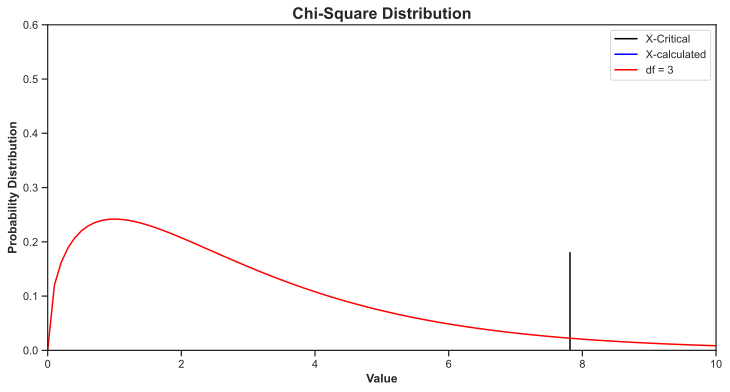

In [ ]:
x = np.linspace(0, 10, 100)


fig,ax = plt.subplots(1,1, figsize=(12,6))

#plotting vertical line for critical value
plt.axvline(x=stats.chi2.isf(0.05,dof), ymin=0, ymax=0.3,label='X-Critical',color='black')

#plotting vertical line for calculated value.
plt.axvline(x=stat, ymin=0, ymax= 0.3,label='X-calculated',color='blue')

#plotting distribution graph for our calculated degrees of freedom
ax.plot(x, stats.chi2.pdf(x, dof), label='df = '+ str(dof), color='red')

ax.set_xlabel('Value',fontsize=12, fontweight='bold')
ax.set_ylabel('Probability Distribution',fontsize=12,fontweight='bold')
ax.set_title('Chi-Square Distribution',fontsize=16,fontweight='bold')

plt.xlim(0, 10)
plt.ylim(0, 0.6)


plt.legend()
plt.show()

# Task 3
## Task 3 (25% max)
1. Visualization and/or simple exploratory data analysis are implemented (5%)
2. Hypotheses are tested (5%)
3. Data was aggregated properly (5%)
4. Results are analysed with commentaries (10%)

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented)
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?


In [ ]:
#reading csv
data = pd.read_csv("master.csv")

In [ ]:
country_data = data[data["country"]=="Serbia"]

In [ ]:
country_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
21968,Serbia,1998,male,75+ years,147,123440,119.09,Serbia1998,NaN,"18,284,194,680",2547,G.I. Generation
21969,Serbia,1998,male,55-74 years,382,817210,46.74,Serbia1998,NaN,"18,284,194,680",2547,Silent
21970,Serbia,1998,female,75+ years,70,200874,34.85,Serbia1998,NaN,"18,284,194,680",2547,G.I. Generation
21971,Serbia,1998,male,35-54 years,308,1082941,28.44,Serbia1998,NaN,"18,284,194,680",2547,Boomers
21972,Serbia,1998,male,25-34 years,107,480472,22.27,Serbia1998,NaN,"18,284,194,680",2547,Generation X


In [ ]:
print(f"Unique sex: {country_data.sex.unique()}")
print("---------------------------------------------------------------------------")
print(f"Unique age: {country_data.age.unique()}")
print("---------------------------------------------------------------------------")
print(f"Unique generation: {country_data.generation.unique()}")
print("---------------------------------------------------------------------------")
print(f"Unique year: {country_data.year.unique()}")

Unique sex: ['male' 'female']
---------------------------------------------------------------------------
Unique age: ['75+ years' '55-74 years' '35-54 years' '25-34 years' '15-24 years'
 '5-14 years']
---------------------------------------------------------------------------
Unique generation: ['G.I. Generation' 'Silent' 'Boomers' 'Generation X' 'Millenials'
 'Generation Z']
---------------------------------------------------------------------------
Unique year: [1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]


In [ ]:
def plot_data(data):
    suic_sum_yr = pd.DataFrame(data['suicides_no'].groupby([data['generation'], data['year']]).sum())
    suic_sum_yr = suic_sum_yr.reset_index().sort_index(ascending=False)
    most_cont_yr = suic_sum_yr
    fig = plt.figure(figsize=(10, 6))
    plt.title('The distribution of suicides by year groups')

    sns.set(font_scale=1)
    sns.barplot(y='suicides_no', x='year', hue='generation',data=most_cont_yr,palette='deep');
    plt.ylabel('Count of suicides')
    plt.xticks(rotation=45)
    plt.tight_layout()

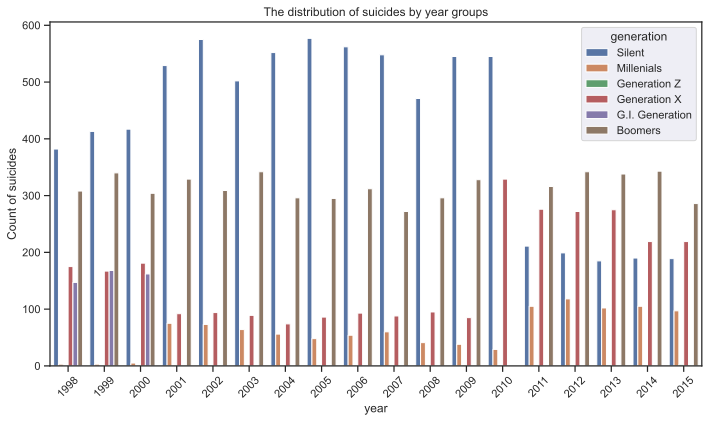

In [ ]:
plot_data(country_data[country_data["sex"] == "male"])

Visualization a feature suicides_no considering other features: sex (in this case - male), generation and year.

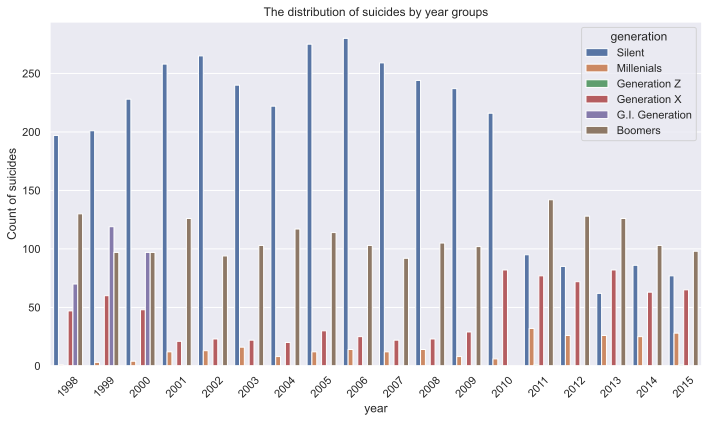

In [ ]:
plot_data(country_data[country_data["sex"] == "female"])

Visualization a feature suicides_no considering other features: sex (in this case - female), generation and year.

Using independent sample t-test to check the difference in suicide rates between male and female. The hypothesis statements for this test are:
- Null Hypothesis → There is no significant difference between men's and women's suicide number.
- Alternative Hypothesis → There is significant difference between men's and women's suicide number.

In [ ]:
male = country_data['suicides_no'][country_data['sex'] == "male"]
female = country_data['suicides_no'][country_data['sex'] == "female"]

In [ ]:
#calculating p value
ttest, p = stats.ttest_rel(male, female)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0). There is significant difference between men's and women's suicide number.")
else:
    print("Independent (H0 holds true). There is no significant difference between men's and women's suicide number.")

p value is 6.197555088081029e-24
Dependent (reject H0). There is significant difference between men's and women's suicide number.


Test Conclusion: By performing T-test, the result obtained is to reject the null hypothesis. This basically means that there is different in suicide rates of male & female.

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
data_2016 = data[data["year"] == 2016].reset_index(drop=True)

In [ ]:
data_2016

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
2,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
3,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
4,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Thailand,2016,female,75+ years,69,1589015,4.34,Thailand2016,NaN,"411,755,164,833",6713,Silent
156,Thailand,2016,female,55-74 years,222,6049756,3.67,Thailand2016,NaN,"411,755,164,833",6713,Boomers
157,Thailand,2016,female,35-54 years,375,10629684,3.53,Thailand2016,NaN,"411,755,164,833",6713,Generation X
158,Thailand,2016,female,25-34 years,116,4702656,2.47,Thailand2016,NaN,"411,755,164,833",6713,Millenials


In [ ]:
data_2016["gdp_per_capita ($)"].nunique()

16

In [ ]:
def split_groups(n_of_groups):
    groups = []
    for i in range(n_of_groups):
        groups.append(data_2016.iloc[:,-2].quantile(q=(i+1)/n_of_groups))
    return groups

In [ ]:
groups = split_groups(4)

In [ ]:
groups

[10432.5, 14595.0, 47259.0, 64708.0]

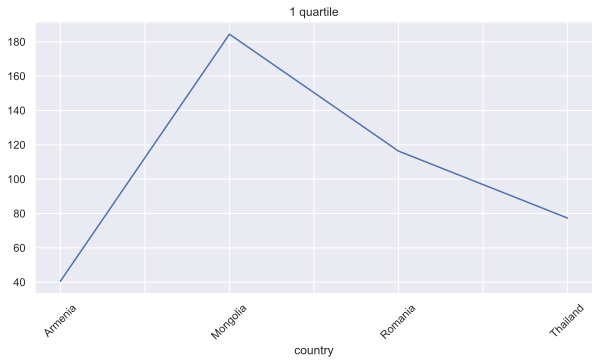

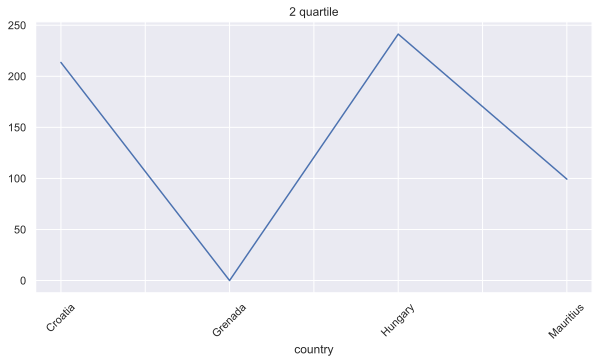

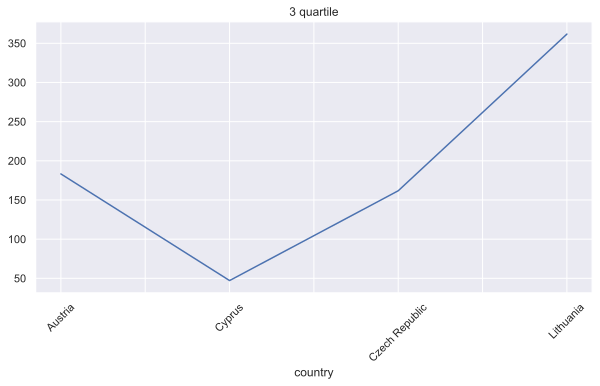

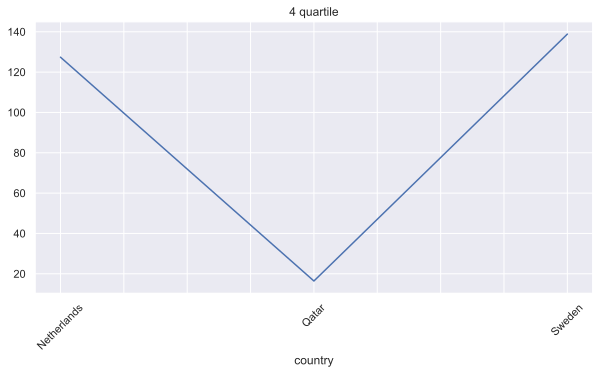

In [ ]:
index = 0
gdp_index = 0
for i in groups:
    index += 1
    plt.figure(figsize = (10, 5))
    plt.title(str(index) + " quartile")
    data_2016[(gdp_index < data_2016.iloc[:, -2]) & (data_2016.iloc[:, -2] < i)].groupby('country')['suicides/100k pop'].sum().plot(rot = 45)
    gdp_index = i
    plt.show()

In [ ]:
conditions = [
    (data_2016['gdp_per_capita ($)'] <= groups[0]),
    (data_2016['gdp_per_capita ($)'] <= groups[1]) & (data_2016['gdp_per_capita ($)'] > groups[0]),
    (data_2016['gdp_per_capita ($)'] <= groups[2]) & (data_2016['gdp_per_capita ($)'] > groups[1]),
    (data_2016['gdp_per_capita ($)'] <= groups[3]) & (data_2016['gdp_per_capita ($)'] > groups[2]),
    ]
# create a list of the values we want to assign for each condition
values = ['group_1', 'group_2', 'group_3', 'group_4']
data_2016['group'] = np.select(conditions, values)
data_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,group
0,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent,group_1
1,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers,group_1
2,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X,group_1
3,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials,group_1
4,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent,group_1


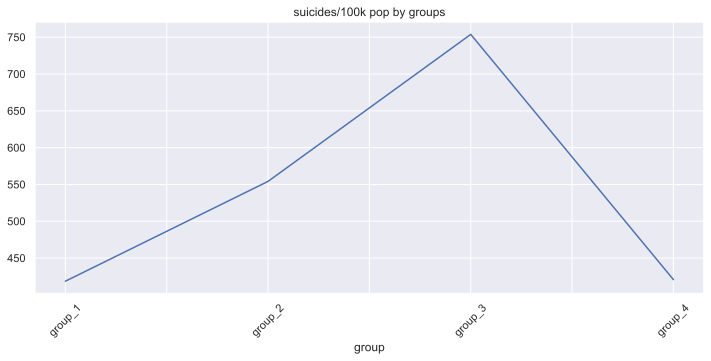

In [ ]:
plt.figure(figsize = (12, 5))
plt.title("suicides/100k pop by groups")
data_2016.groupby('group')['suicides/100k pop'].sum().plot(rot = 45)
plt.show()

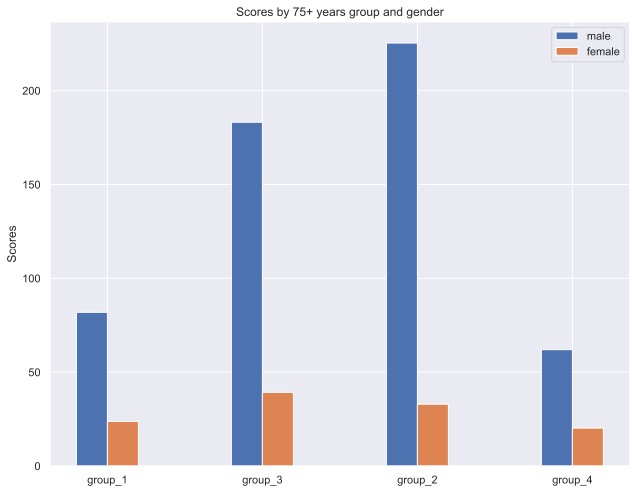

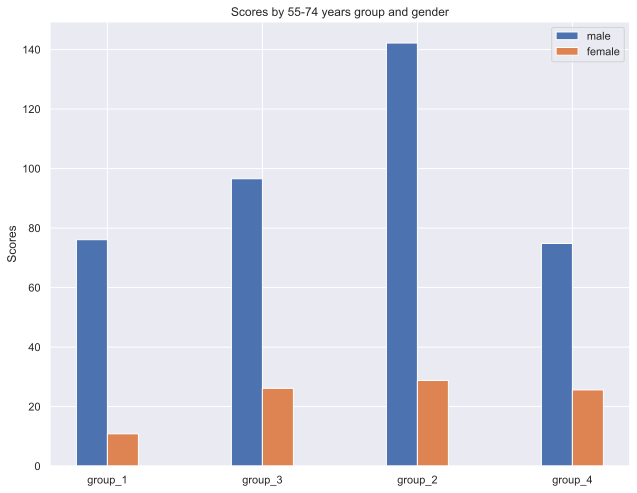

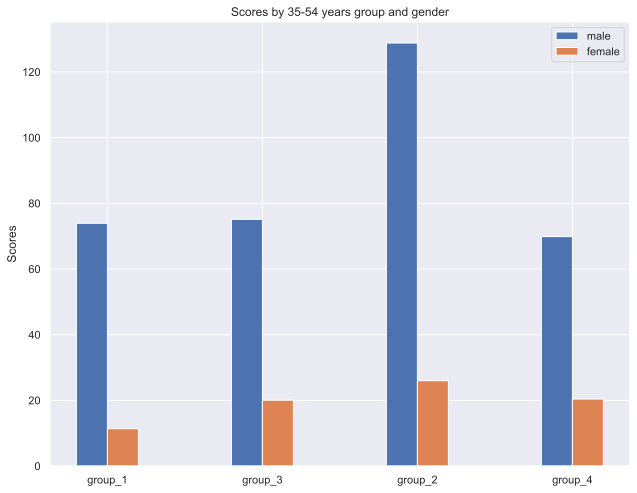

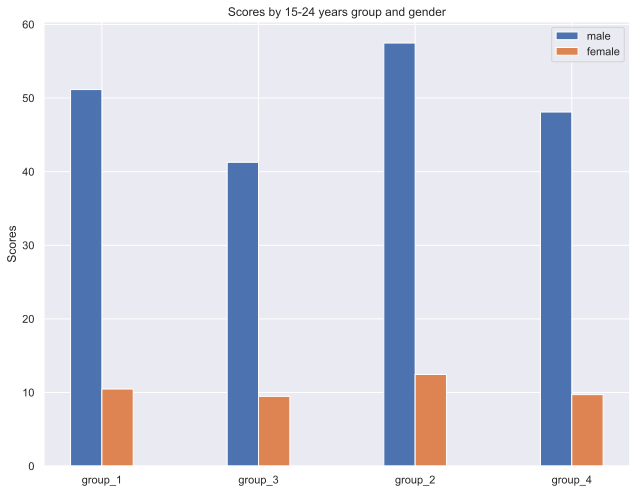

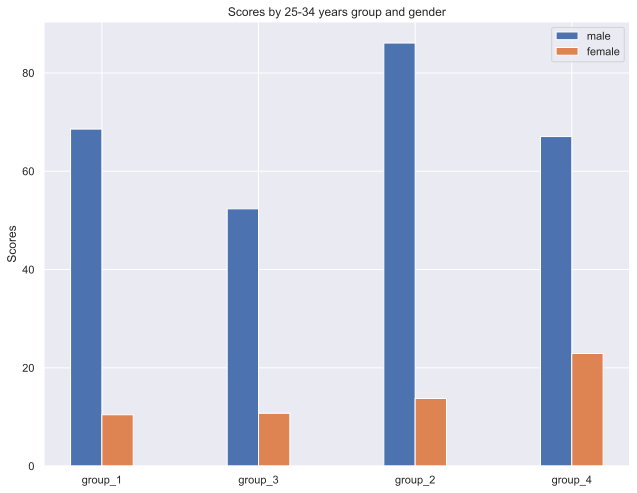

In [ ]:
for age_group in data_2016['age'].unique():

    labels = data_2016['group'].unique()
    men_means = data_2016[(data_2016['age'] == age_group) & (data_2016['sex'] == "male")].groupby('group')['suicides/100k pop'].sum()
    women_means = data_2016[(data_2016['age'] == age_group) & (data_2016['sex'] == "female")].groupby('group')['suicides/100k pop'].sum()

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, men_means, width, label='male')
    rects2 = ax.bar(x + width/2, women_means, width, label='female')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(f'Scores by {age_group} group and gender')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()